In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_features=2,
                  n_samples=30,
                  centers=2,
                  random_state=5,
                  cluster_std=0.4
                  )

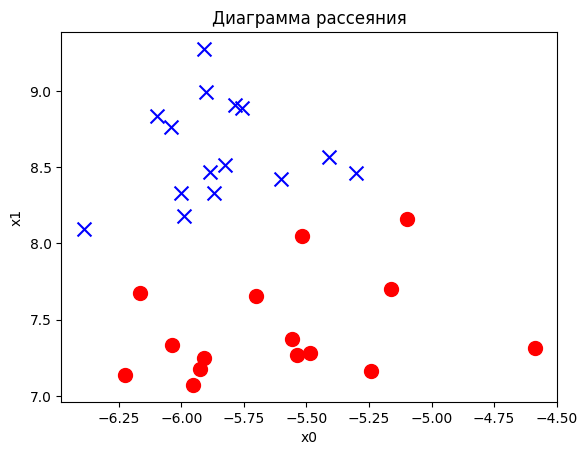

In [3]:
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker='o', color='r', s=100)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker='x', color='b', s=100)

plt.title('Диаграмма рассеяния')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [4]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [5]:
svm_linear.coef_[0][1]
svm_linear.intercept_

array([-64.2533988])

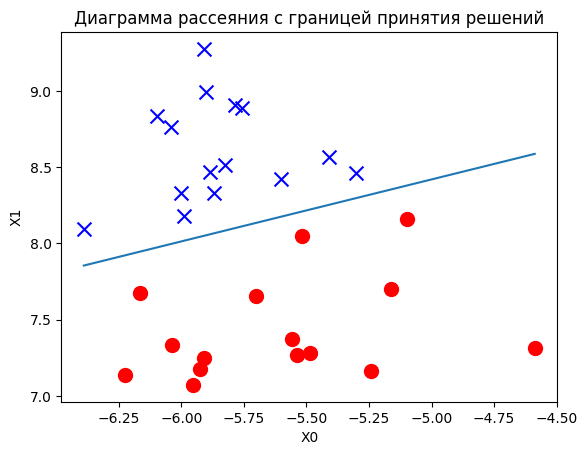

In [6]:
X1 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
plt.plot(X1, -svm_linear.intercept_ / svm_linear.coef_[0][1] - svm_linear.coef_[0][0] * X1 / svm_linear.coef_[0][1])

plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker='o', color='r', s=100)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker='x', color='b', s=100)

plt.title('Диаграмма рассеяния с границей принятия решений')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [7]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [8]:
svm_linear.support_

array([ 0,  8, 29])

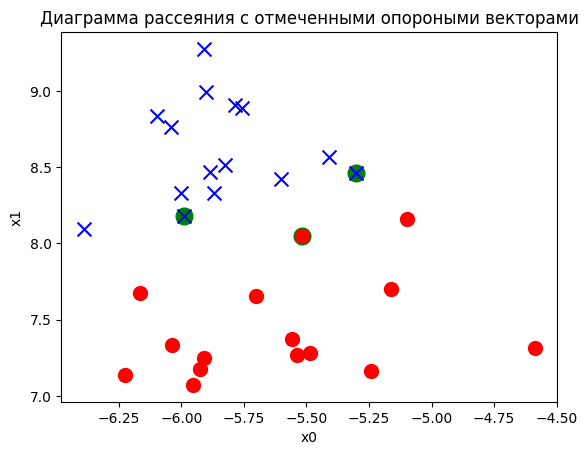

In [9]:
plt.scatter(svm_linear.support_vectors_[:, 0],
            svm_linear.support_vectors_[:, 1], linewidths=7, facecolors='green')

plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker='o', color='r', s=100)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker='x', color='b', s=100)

plt.title("Диаграмма рассеяния с отмеченными опороными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

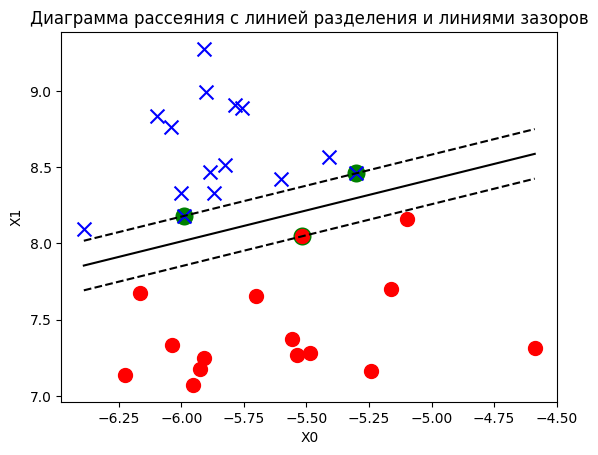

In [10]:
plt.plot(X1,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X1, c='k')

plt.plot(X1,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X1,linestyle='--', c='k')
plt.plot(X1,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X1,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

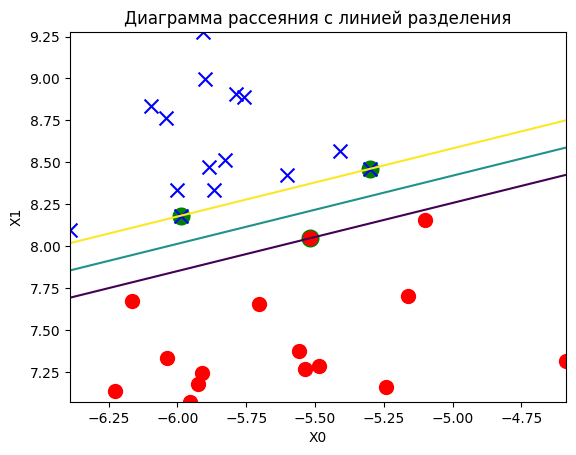

In [11]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X1_grid, X2_grid = np.meshgrid(X0, X1)

Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X1_grid +  svm_linear.coef_[0][1] * X2_grid

plt.contour(X1_grid, X2_grid, Z, levels=[-1, 0, 1])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [12]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

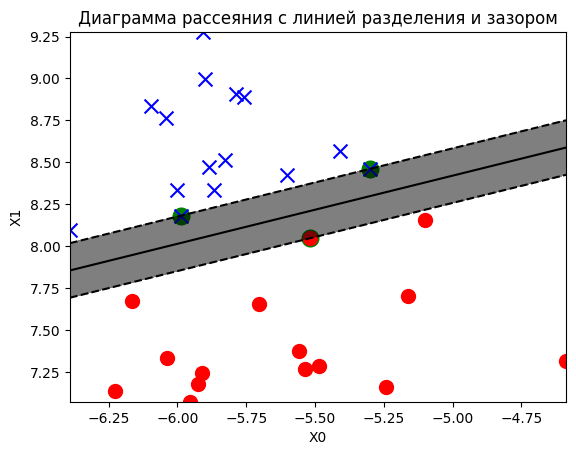

In [13]:
plot_decision_regions(X, y, svm_linear)

In [14]:
y_pred = svm_linear.predict(X)

In [15]:
from sklearn import metrics
metrics.accuracy_score(y, y_pred)

1.0

In [16]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]], dtype=int64)

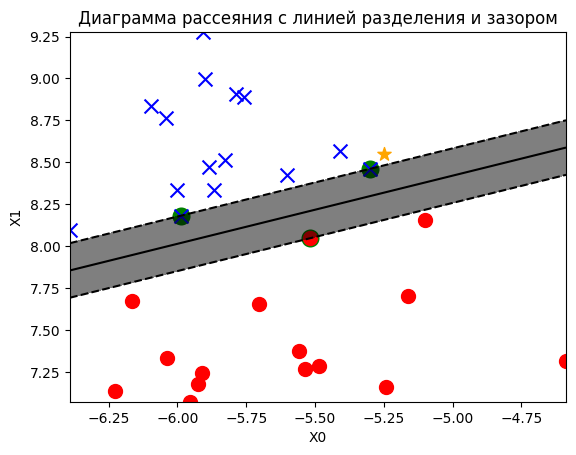

In [18]:
observation_new = [[-5.25, 8.55]]
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='orange', s=100)
plot_decision_regions(X, y, svm_linear)

In [19]:
svm_linear.decision_function(observation_new)

array([1.42285552])

In [20]:
svm_linear.predict(observation_new)

array([1])